# Practical task B: Bike hires


# Importing libraries and data

## Importing the libraries

In [1]:
# Import the pandas data analysis library
import pandas as pd

# Import the seaborn visualisation library
import seaborn as sns

In [2]:
# Import scikit learn functions for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Importing the data

In [3]:
bike_data = pd.read_csv('Bike Hires Hourly.csv')
bike_data

,dteday,season,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,2011-01-01,Winter,0,0,1,3,3,81,0,3,13
1,2011-01-01,Winter,1,0,1,2,1,80,0,8,32
2,2011-01-01,Winter,2,0,1,2,1,80,0,5,27
3,2011-01-01,Winter,3,0,1,3,3,75,0,3,10
4,2011-01-01,Winter,4,0,1,3,3,75,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Winter,19,1,2,4,1,60,11,11,108
17375,2012-12-31,Winter,20,1,2,4,1,60,11,8,81
17376,2012-12-31,Winter,21,1,1,4,1,60,11,7,83
17377,2012-12-31,Winter,22,1,1,4,1,56,8,13,48


The data set shows the bicycle hires two years for a bike hire scheme in Washington, DC. Each individual records represents an hour.

Features:
* **dteday**: Date
* **season**: Season
* **hr**: Hour of the day (0 - 23)
* **workingday**: Working day or weekend/holiday: 0 = holiday or weekend, 1 = working day
* **weathersit**: Weather situation
 	1 = Clear, Few clouds, Partly cloudy, Partly cloudy
 	2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 	3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 	4 = Heavy Rain + Hail + Thunderstorm + Mist, Snow + Fog
* **temp**: Temperature in Celsius (°C)
* **atemp**: 'Feeling' temperature (°C)
* **hum**: Humidity (%)
* **windspeed**: Windspeed (knots)
* **casual**: Number of casual hires
* **registered**: Number of hires by registered users


# Exploratory Data Analysis
Explore the data to investigate whether there are any patterns in the number of casual or registered bike hires.

You could:
* Compare the statistics for casual or registered hires for different values of the **categorical features**.
* Create charts to compare the difference between casual or registered hires for one of the **categorical features**.
* Create scatter plots to show the relationship between casual or registered hires and one of the other **numerical features**.

## Slices

In [4]:
weekend_data = bike_data[bike_data['workingday'] == 0].copy()
weekend_data

,dteday,season,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,2011-01-01,Winter,0,0,1,3,3,81,0,3,13
1,2011-01-01,Winter,1,0,1,2,1,80,0,8,32
2,2011-01-01,Winter,2,0,1,2,1,80,0,5,27
3,2011-01-01,Winter,3,0,1,3,3,75,0,3,10
4,2011-01-01,Winter,4,0,1,3,3,75,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17350,2012-12-30,Winter,19,0,1,7,7,61,0,16,86
17351,2012-12-30,Winter,20,0,1,2,-2,47,22,9,63
17352,2012-12-30,Winter,21,0,1,1,-2,51,11,5,42
17353,2012-12-30,Winter,22,0,1,1,-2,55,12,6,30


## Data Statistics

In [5]:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      17379 non-null  object
 1   season      17379 non-null  object
 2   hr          17379 non-null  int64 
 3   workingday  17379 non-null  int64 
 4   weathersit  17379 non-null  int64 
 5   temp        17379 non-null  int64 
 6   atemp       17379 non-null  int64 
 7   hum         17379 non-null  int64 
 8   windspeed   17379 non-null  int64 
 9   casual      17379 non-null  int64 
 10  registered  17379 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.5+ MB


In [6]:
# the workingday field is used to create a new field: Rworkingday
# the replace dictionary uses a colon to indicate what is to be replaced and commas to separate the items
# originally the day of the week was represented using 0 for holiday or weekend and 1 for workingday so i replaced it back to strings, to make it easier to compare and understand
bike_data['Rworkingday'] = bike_data['workingday'].replace({0: 'holiday or weekend',
                                                         1: 'workingday'})
bike_data

,dteday,season,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Rworkingday
0,2011-01-01,Winter,0,0,1,3,3,81,0,3,13,holiday or weekend
1,2011-01-01,Winter,1,0,1,2,1,80,0,8,32,holiday or weekend
2,2011-01-01,Winter,2,0,1,2,1,80,0,5,27,holiday or weekend
3,2011-01-01,Winter,3,0,1,3,3,75,0,3,10,holiday or weekend
4,2011-01-01,Winter,4,0,1,3,3,75,0,0,1,holiday or weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Winter,19,1,2,4,1,60,11,11,108,workingday
17375,2012-12-31,Winter,20,1,2,4,1,60,11,8,81,workingday
17376,2012-12-31,Winter,21,1,1,4,1,60,11,7,83,workingday
17377,2012-12-31,Winter,22,1,1,4,1,56,8,13,48,workingday


In [7]:
# the workingday field is used to create a new field: Rworkingday
# the replace dictionary uses a colon to indicate what is to be replaced and commas to separate the items
bike_data['Rhr'] = bike_data['hr'].replace({0: 'early morning',1: 'early morning',2: 'early morning',3: 'early morning',4: 'early morning',5: 'early morning',6: 'morning',7: 'morning',8: 'morning',9: 'morning',10: 'morning',11: 'morning',12: 'afternoon',13: 'afternoon',14: 'afternoon',15: 'afternoon',16: 'afternoon',17: 'afternoon',18: 'evening',19: 'evening',20: 'evening',21: 'evening',22: 'evening',23: 'evening'})
bike_data

,dteday,season,hr,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Rworkingday,Rhr
0,2011-01-01,Winter,0,0,1,3,3,81,0,3,13,holiday or weekend,early morning
1,2011-01-01,Winter,1,0,1,2,1,80,0,8,32,holiday or weekend,early morning
2,2011-01-01,Winter,2,0,1,2,1,80,0,5,27,holiday or weekend,early morning
3,2011-01-01,Winter,3,0,1,3,3,75,0,3,10,holiday or weekend,early morning
4,2011-01-01,Winter,4,0,1,3,3,75,0,0,1,holiday or weekend,early morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Winter,19,1,2,4,1,60,11,11,108,workingday,evening
17375,2012-12-31,Winter,20,1,2,4,1,60,11,8,81,workingday,evening
17376,2012-12-31,Winter,21,1,1,4,1,60,11,7,83,workingday,evening
17377,2012-12-31,Winter,22,1,1,4,1,56,8,13,48,workingday,evening


## Further exploration of slices of the data set

You could:
* Create some slices based on a **categorical feature**.
* Explore these slices using suitable charts and statistics.

In [8]:
# use describe to get the statistics for the feature
bike_data['casual'].describe()

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

In [9]:
# use describe to get the statistics for the feature
bike_data['registered'].describe()

count    17379.000000
mean       153.786869
std        151.357286
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        886.000000
Name: registered, dtype: float64

In [10]:
bike_data['Rhr'].value_counts()

afternoon        4375
evening          4368
morning          4360
early morning    4276
Name: Rhr, dtype: int64

In [11]:
bike_data['Rworkingday'].value_counts()

workingday            11865
holiday or weekend     5514
Name: Rworkingday, dtype: int64

In [12]:
# find the statistics for MCZ_1 column grouped by Sex
bike_data.groupby('Rworkingday')['weathersit'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Rworkingday,,,,,,,,
holiday or weekend,5514.0,1.38,0.61,1.0,1.0,1.0,2.0,4.0
workingday,11865.0,1.44,0.65,1.0,1.0,1.0,2.0,4.0


In [13]:
# create a list of the features to be explored
features = ['season','Rhr','weathersit','temp', 'hum','windspeed',]

# use group by to get the means of these features for male and female
bike_data.groupby('Rworkingday')[features].mean().round(2)

,weathersit,temp,hum,windspeed
Rworkingday,,,,
holiday or weekend,1.38,14.17,62.24,12.5
workingday,1.44,15.24,62.90,12.3


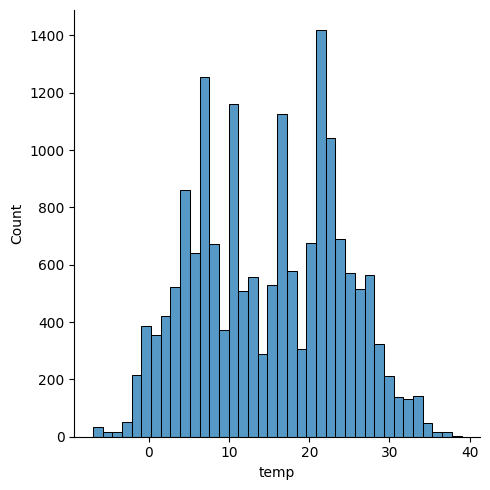

In [14]:
sns.displot(data=bike_data, x='temp');

## Casual vs Registered Bookings

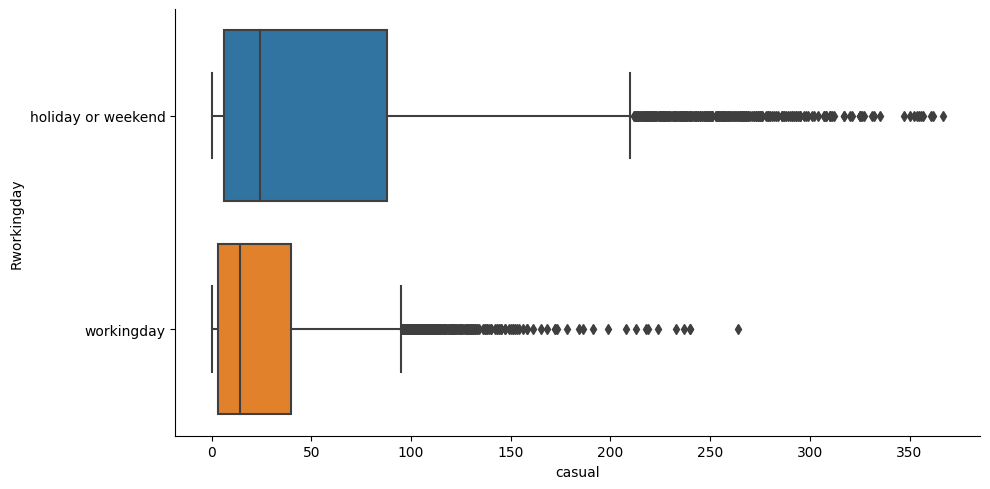

In [15]:
sns.catplot(bike_data, kind='box', x='casual', y='Rworkingday', aspect=2);


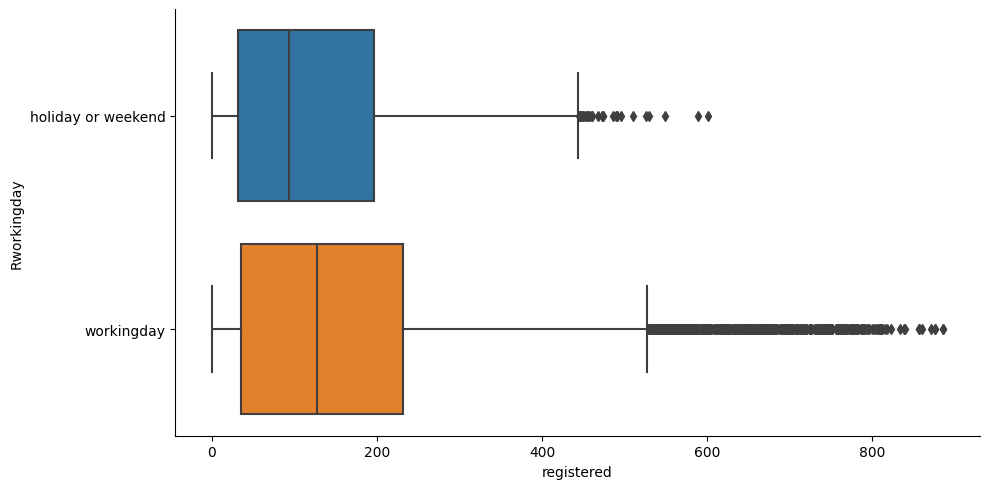

In [16]:
sns.catplot(bike_data, kind='box', x='registered', y='Rworkingday', aspect=2);


### 

In [17]:
bike_data.groupby('season')['casual'].describe().round(3)


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Autumn,4232.0,30.667,46.034,0.0,4.0,14.0,36.0,362.0
Spring,4409.0,46.161,57.456,0.0,7.0,27.0,61.0,361.0
Summer,4496.0,50.287,51.752,0.0,10.0,36.0,72.0,350.0
Winter,4242.0,14.291,27.463,0.0,1.0,5.0,15.0,367.0


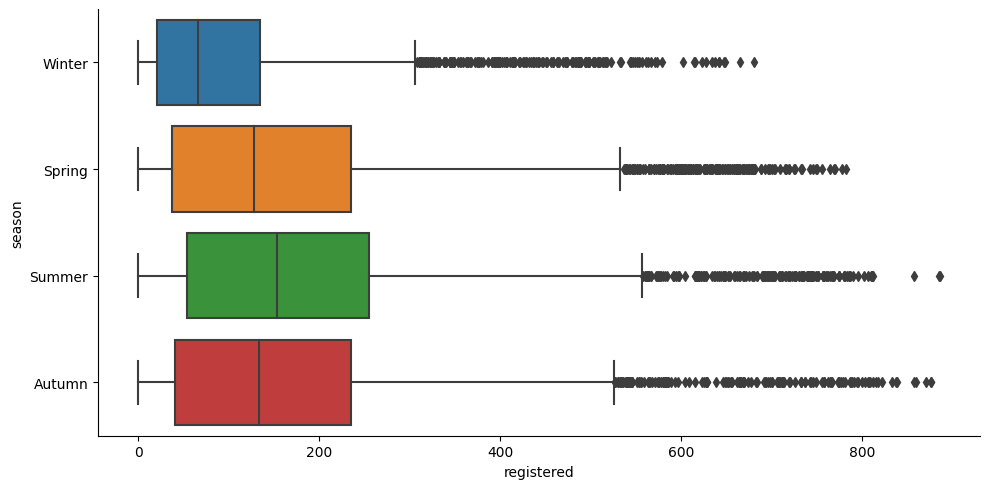

In [18]:
sns.catplot(bike_data, kind='box', x='registered', y='season', aspect=2);


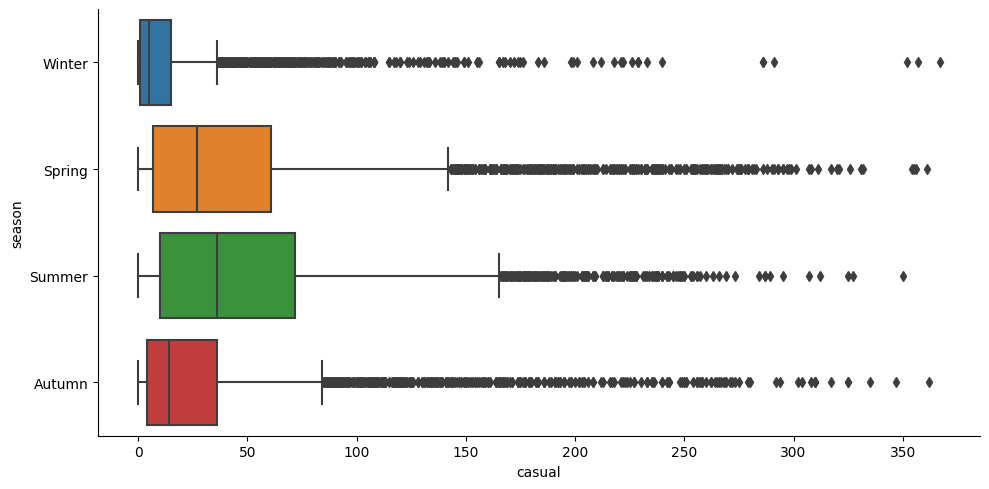

In [19]:
# draw box plots grouped by station
sns.catplot(data=bike_data, kind='box', x='casual', y='season', aspect=2 );


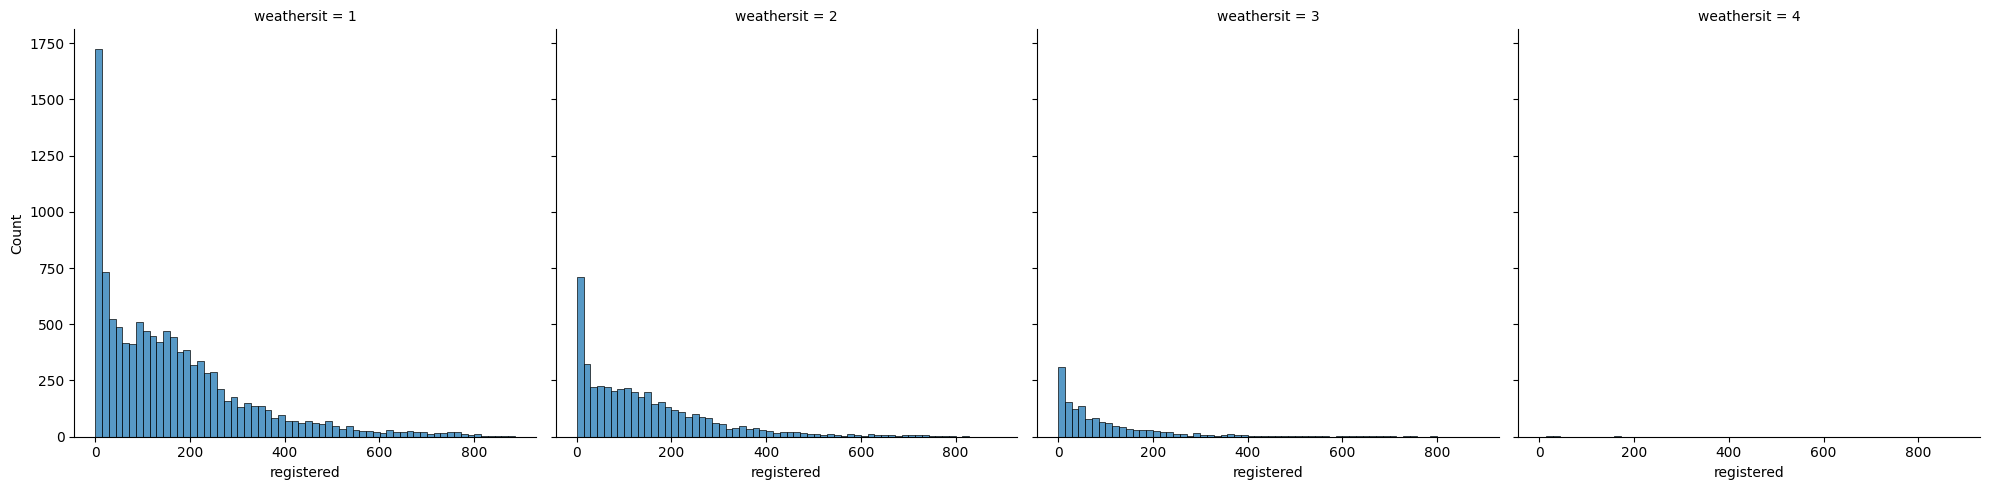

In [20]:
# create histograms of life expectancy by region
# col='Region' - one column per region
sns.displot(data=bike_data, x='registered', col='weathersit');

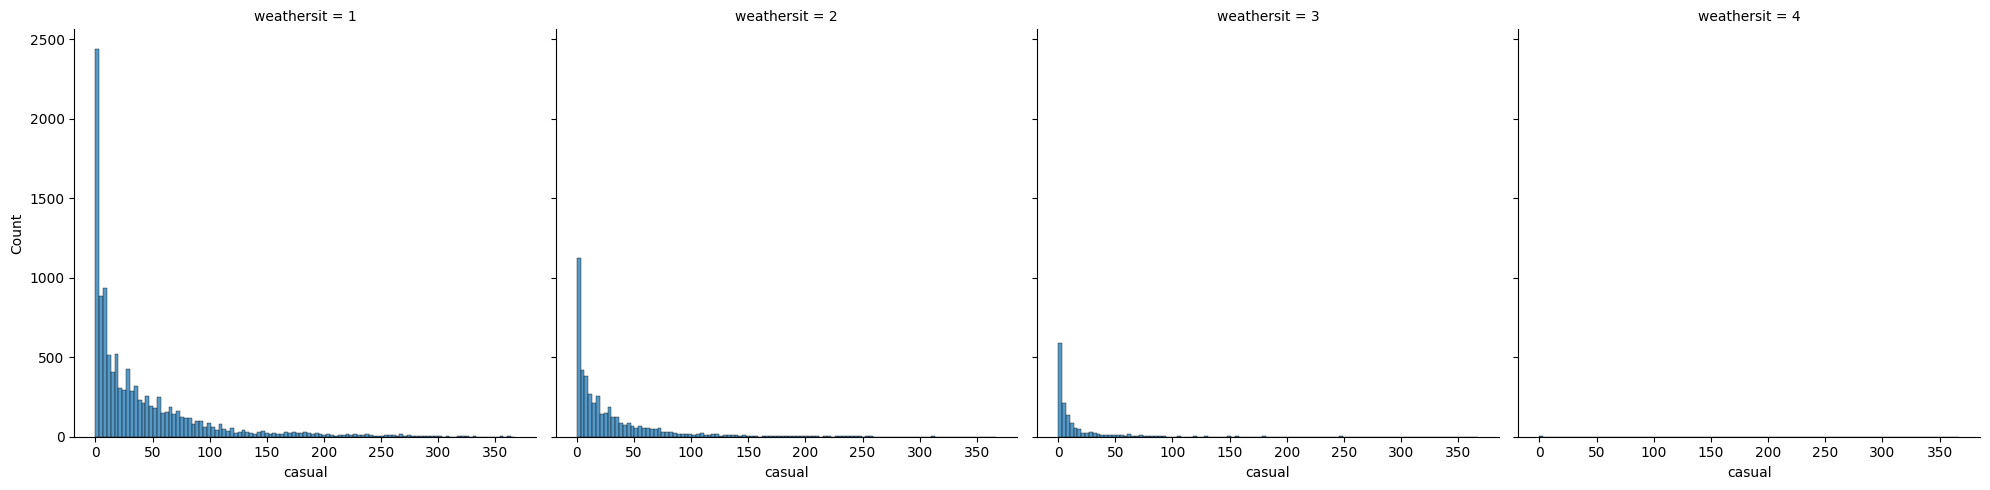

In [21]:
# create histograms of life expectancy by region
# col='Region' - one column per region
sns.displot(data=bike_data, x='casual', col='weathersit');

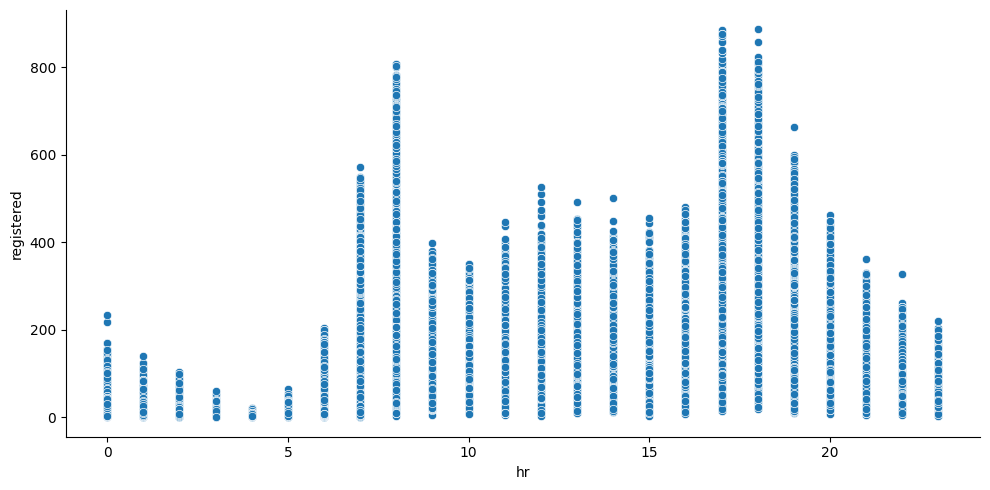

In [22]:
# create a scatter plot
sns.relplot(data=bike_data, x="hr", y="registered", aspect=2);

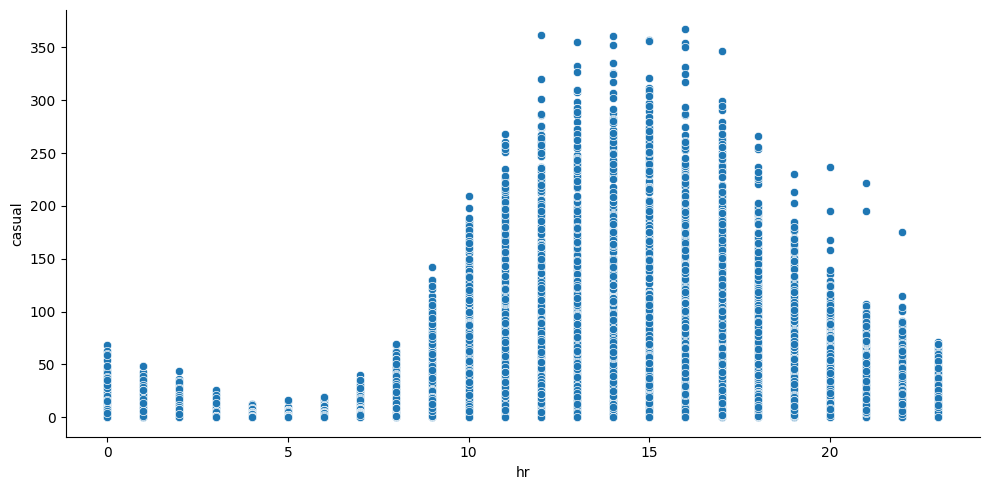

In [23]:
sns.relplot(bike_data, x='hr', y='casual', aspect=2);

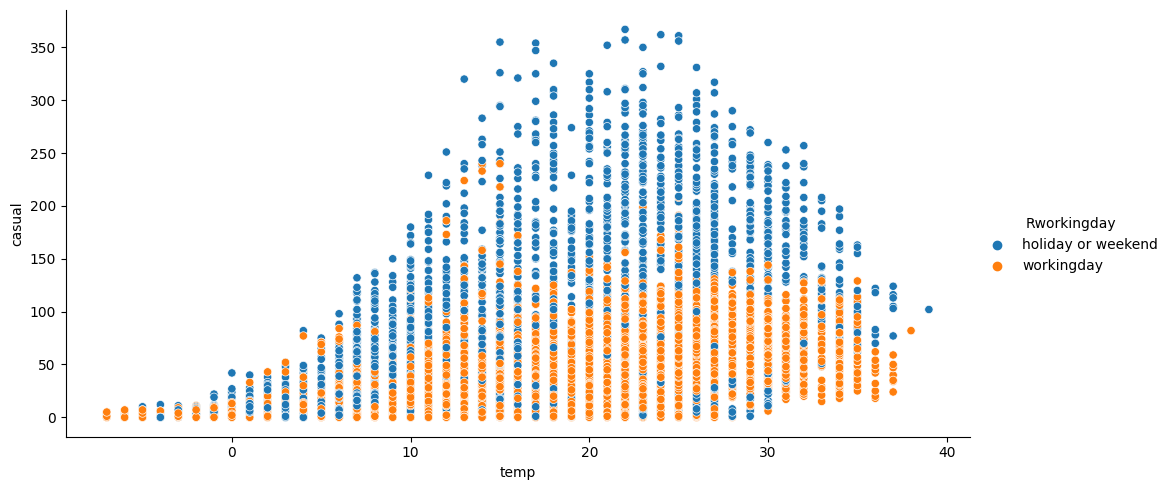

In [24]:
sns.relplot(data=bike_data, x='temp', y='casual',hue='Rworkingday', aspect=2);

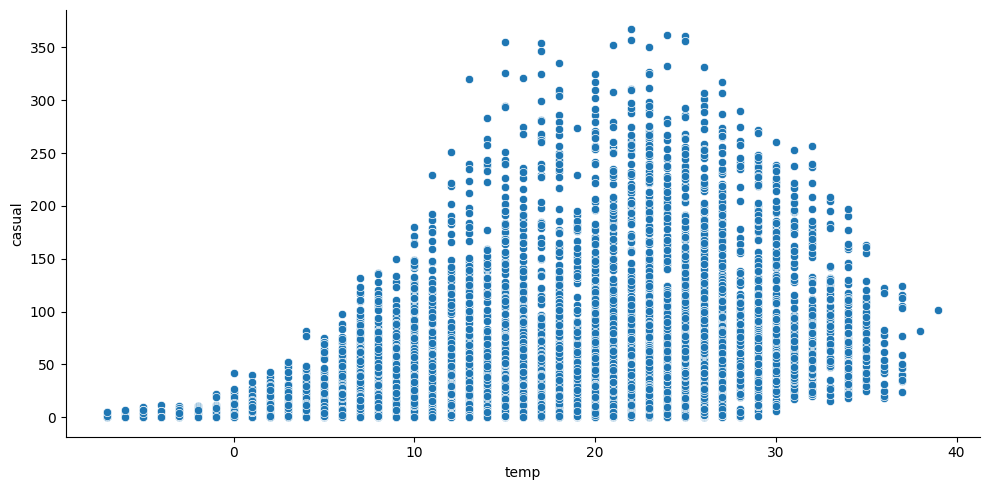

In [25]:
sns.relplot(data=bike_data, x='temp', y='casual', aspect=2);

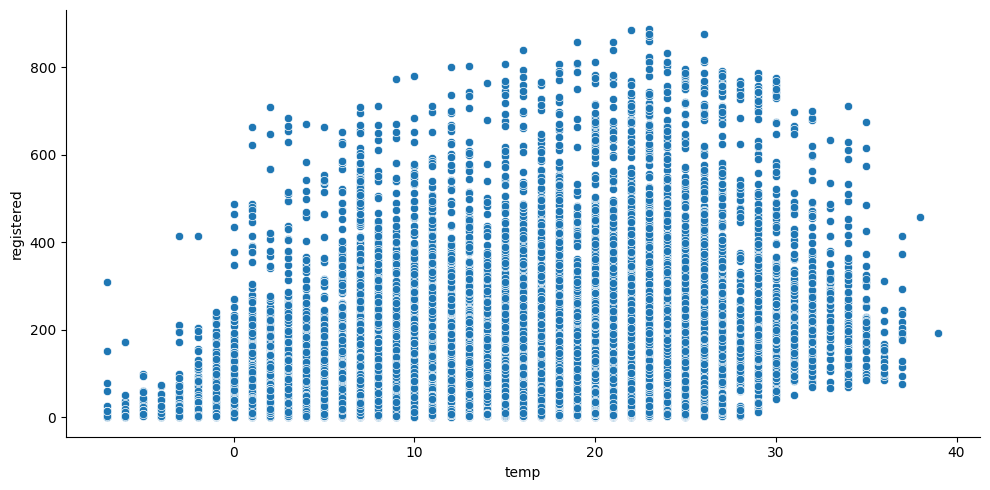

In [26]:
sns.relplot(data=bike_data, x='temp', y='registered', aspect=2);

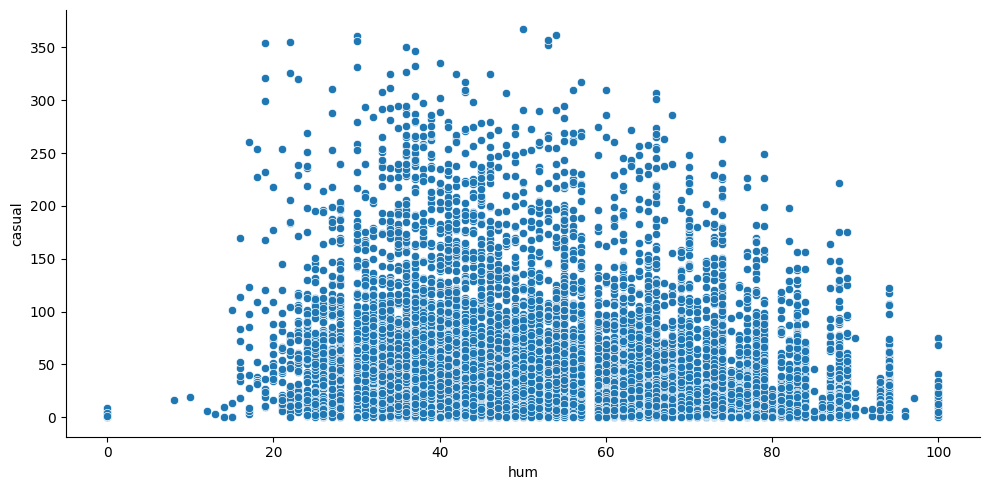

In [27]:
sns.relplot(data=bike_data, x='hum', y='casual', aspect=2);


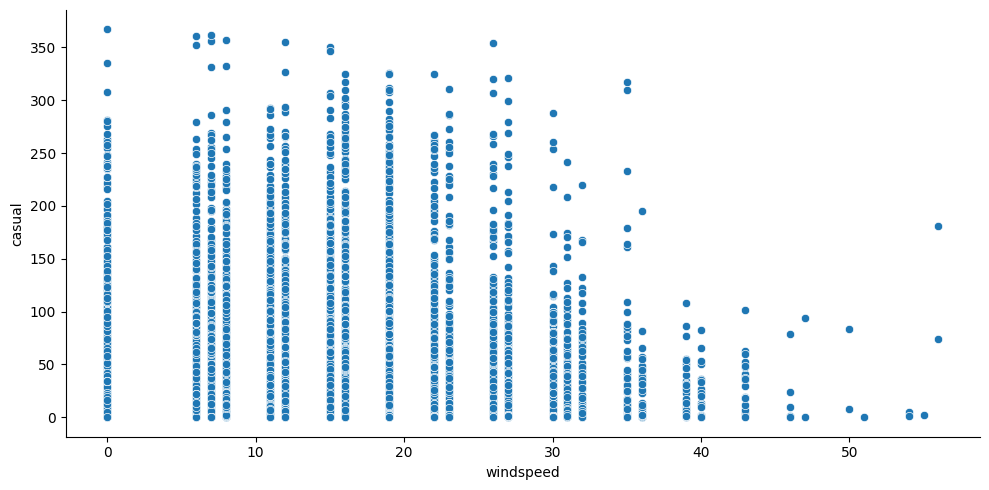

In [28]:
sns.relplot(data=bike_data, x='windspeed', y='casual', aspect=2);


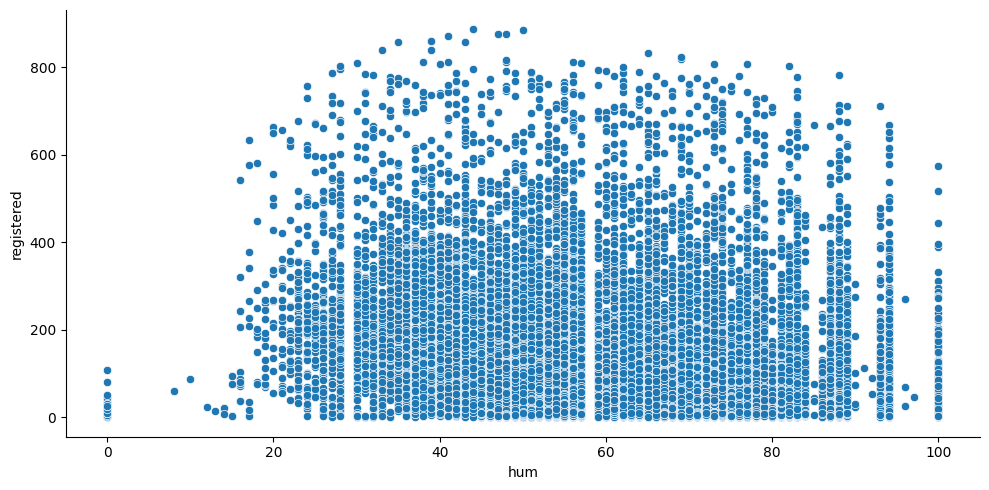

In [29]:
sns.relplot(data=bike_data, x='hum', y='registered', aspect=2);


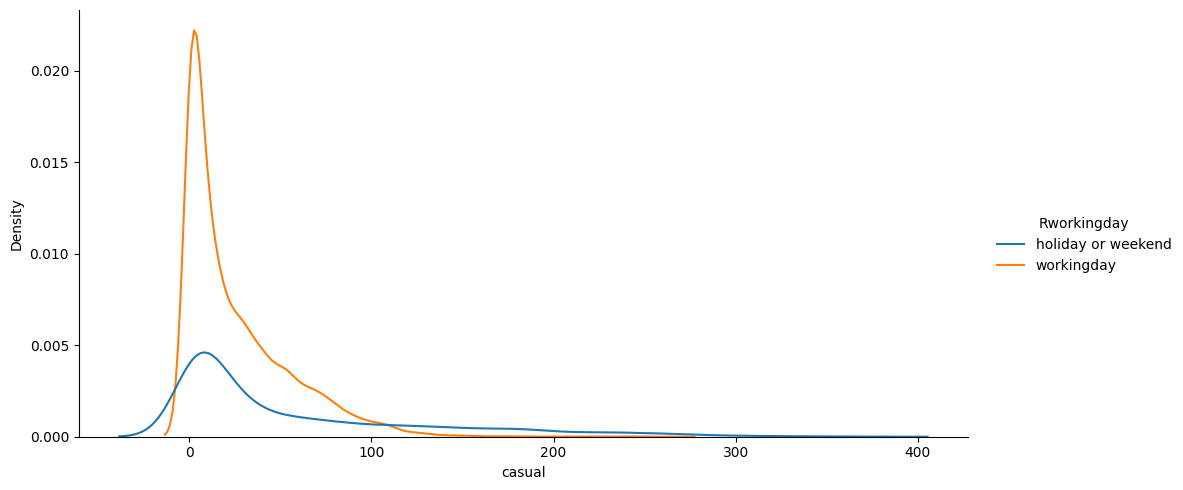

In [30]:
# create a kde plot with one curve for each income category
# hue='High Income Economy' - draw separate curves for the four subsets
sns.displot(data=bike_data, kind='kde', x='casual', hue='Rworkingday', aspect=2);

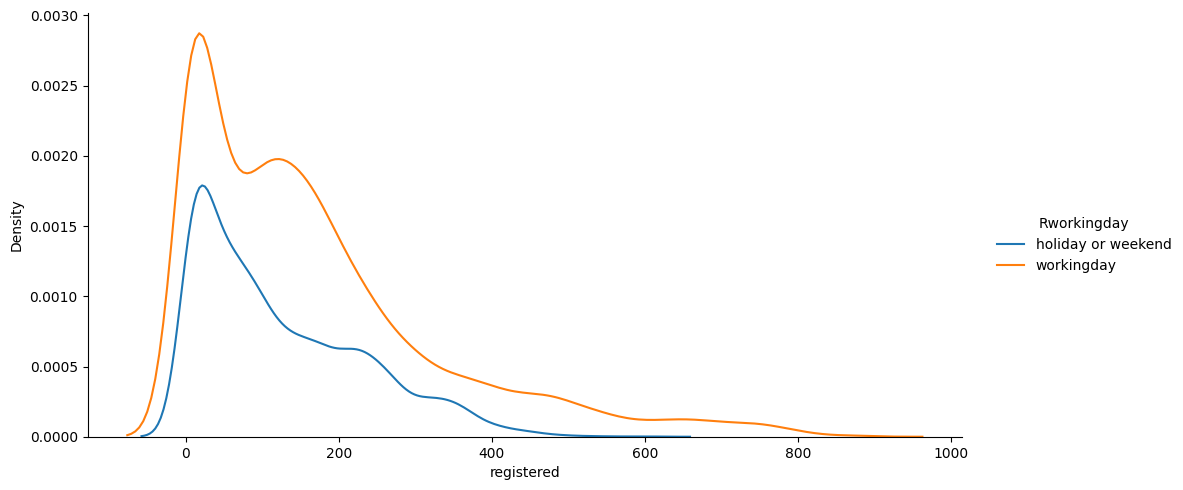

In [31]:
# create a kde plot with one curve for each income category
# hue='High Income Economy' - draw separate curves for the four subsets
sns.displot(data=bike_data, kind='kde', x='registered', hue='Rworkingday', aspect=2);

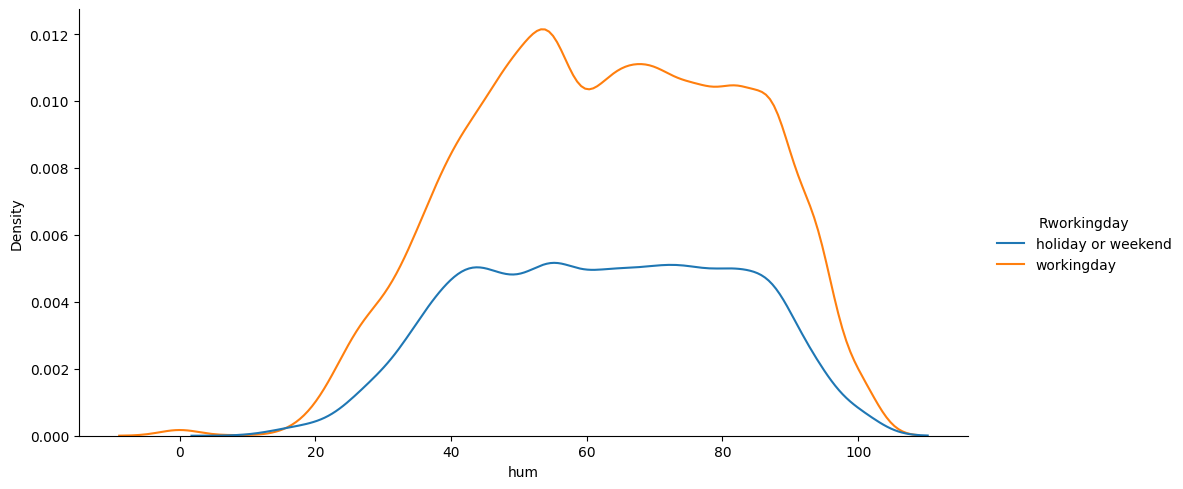

In [32]:
# KDE plot of flipper length grouped by species
sns.displot(data=bike_data, kind='kde', x='hum', hue='Rworkingday', aspect=2);

In [33]:
# Define the input features
input_features=['atemp']
target='temp'

# create the model
linear_model = LinearRegression().fit(bike_data[input_features], bike_data[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)


Coefficients: 
 [0.79191672]
Intercept: 
 3.008919614206551


In [34]:
# Define the input features
input_features=['casual']
target='temp'

# create the model
linear_model = LinearRegression().fit(bike_data[input_features], bike_data[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)


Coefficients: 
 [0.08348028]
Intercept: 
 11.926451852733667


In [35]:
# Define the input features
input_features=['registered']
target='casual'

# create the model
linear_model = LinearRegression().fit(bike_data[input_features], bike_data[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)


Coefficients: 
 [0.16503204]
Intercept: 
 10.296458231132767


In [36]:
# define target
y = bike_data['casual']
# create a list of all the input features and define the X
all_features = [ 'temp', 'atemp', 'hum', 'windspeed']
X_all = bike_data[all_features]
# perform the training-testing split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, random_state=1)
# display the length of the lists to check
print("Size of X_train: ",X_train.shape)
print("Length of y_train: ",len(y_train))
print("Size of X_test: ",X_test.shape)
print("Length of y_test: ",len(y_test))

Size of X_train:  (13903, 4)
Length of y_train:  13903
Size of X_test:  (3476, 4)
Length of y_test:  3476


In [37]:
# define target
y = bike_data['registered']
# create a list of all the input features and define the X
all_features = [ 'temp', 'atemp', 'hum', 'windspeed']
X_all = bike_data[all_features]
# perform the training-testing split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, random_state=1)
# display the length of the lists to check
print("Size of X_train: ",X_train.shape)
print("Length of y_train: ",len(y_train))
print("Size of X_test: ",X_test.shape)
print("Length of y_test: ",len(y_test))

Size of X_train:  (13903, 4)
Length of y_train:  13903
Size of X_test:  (3476, 4)
Length of y_test:  3476


In [38]:
# Define the input features
input_features=['atemp']
# create the model
linear_model = LinearRegression().fit(X_train[input_features], y_train)
# display the parameters - output the coefficients and y-intercept
print('Coefficients: ', linear_model.coef_)
print('Intercept: ', linear_model.intercept_)
# create a list of the predictions
y_pred = linear_model.predict(X_test[input_features])
# give the RMSE and R² score for the predictions
print('RMSE: ',mean_squared_error(y_test, y_pred, squared=False))
print('R²: ',100*r2_score(y_test, y_pred))


Coefficients:  [4.46345874]
Intercept:  86.36879018082661
RMSE:  143.535504022972
R²:  11.227622403630145


In [39]:
# Define the input features
input_features=['atemp','windspeed']
# create the model
linear_model = LinearRegression().fit(X_train[input_features], y_train)
# display the parameters - output the coefficients and y-intercept
print('Coefficients: ', linear_model.coef_)
print('Intercept: ', linear_model.intercept_)
# create a list of the predictions
y_pred = linear_model.predict(X_test[input_features])
# give the RMSE and R² score for the predictions
print('RMSE: ',mean_squared_error(y_test, y_pred, squared=False))
print('R²: ',100*r2_score(y_test, y_pred))


Coefficients:  [4.55012499 1.85540526]
Intercept:  62.192532520277055
RMSE:  142.45842087812687
R²:  12.554910538507292


In [40]:
# define target
target = 'casual'
y = weekend_data[target]

# create a list of all the input features and define the X
all_features = [ 'temp', 'atemp', 'hum', 'windspeed']
X_all = weekend_data[all_features]

# perform the training-testing split
X_weekend_train, X_weekend_test, y_weekend_train, y_weekend_test = train_test_split(X_all, y, train_size=0.8, random_state=1)
 
# display the length of the lists to check
print("Size of X_weekend_train: ",X_weekend_train.shape)
print("Length of y_weekend_train: ",len(y_weekend_train))
print("Size of X_weekend_test: ",X_weekend_test.shape)
print("Length of y_weekend_test: ",len(y_weekend_test))

Size of X_weekend_train:  (4411, 4)
Length of y_weekend_train:  4411
Size of X_weekend_test:  (1103, 4)
Length of y_weekend_test:  1103


In [41]:
# define target
target = 'registered'
y = weekend_data[target]

# create a list of all the input features and define the X
all_features = [ 'temp', 'atemp', 'hum', 'windspeed']
X_all = weekend_data[all_features]

# perform the training-testing split
X_weekend_train, X_weekend_test, y_weekend_train, y_weekend_test = train_test_split(X_all, y, train_size=0.9, random_state=1)
 
# display the length of the lists to check
print("Size of X_weekend_train: ",X_weekend_train.shape)
print("Length of y_weekend_train: ",len(y_weekend_train))
print("Size of X_weekend_test: ",X_weekend_test.shape)
print("Length of y_weekend_test: ",len(y_weekend_test))

Size of X_weekend_train:  (4962, 4)
Length of y_weekend_train:  4962
Size of X_weekend_test:  (552, 4)
Length of y_weekend_test:  552


In [42]:
# Define the input features
input_features=['atemp']


# create the model
linear_model = LinearRegression().fit(X_weekend_train[input_features], y_weekend_train)

# display the parameters - output the coefficients and y-intercept
print('Coefficients: ', linear_model.coef_)
print('Intercept: ', linear_model.intercept_)

# create a list of the predictions
y_weekend_pred = linear_model.predict(X_weekend_test[input_features])

# give the RMSE and R² score for the predictions
print('RMSE: ',mean_squared_error(y_weekend_test, y_weekend_pred, squared=False))
print('R²: ',100*r2_score(y_weekend_test, y_weekend_pred))


Coefficients:  [4.30663716]
Intercept:  63.57277888377704
RMSE:  94.9800349075916
R²:  23.67562495314085


In [43]:
# Define the input features
input_features=['hr', 'workingday']
target='registered'

# create the model
linear_model = LinearRegression().fit(bike_data[input_features], bike_data[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(bike_data[input_features])

# give the R² score and MSE for the predictions by comparing the predictions to the target in the new list
print('RMSE: ',mean_squared_error(bike_data[target], y_pred, squared=False))
print('R²: ',100*r2_score(bike_data[target], y_pred))

Coefficients: 
 [ 8.18331589 43.40474008]
Intercept: 
 29.662844564907886
RMSE:  138.8991306482696
R²:  15.779583966532373


In [44]:
# Define the input features
input_features=['atemp', 'workingday']
target='casual'

# create the model
linear_model = LinearRegression().fit(bike_data[input_features], bike_data[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(bike_data[input_features])

# give the R² score and MSE for the predictions by comparing the predictions to the target in the new list
print('RMSE: ',mean_squared_error(bike_data[target], y_pred, squared=False))
print('R²: ',100*r2_score(bike_data[target], y_pred))

Coefficients: 
 [  2.07305475 -34.58872701]
Intercept: 
 28.150218487234994
RMSE:  40.93217295338545
R²:  31.075737186310082


In [45]:
# Define the input features
input_features=['atemp', 'weathersit']
target='casual'

# create the model
linear_model = LinearRegression().fit(bike_data[input_features], bike_data[target])

# display the parameters - output the coefficients and y-intercept
print('Coefficients: \n', linear_model.coef_)
print('Intercept: \n', linear_model.intercept_)

# create a list of the predictions
y_pred = linear_model.predict(bike_data[input_features])

# give the R² score and MSE for the predictions by comparing the predictions to the target in the new list
print('RMSE: ',mean_squared_error(bike_data[target], y_pred, squared=False))
print('R²: ',100*r2_score(bike_data[target], y_pred))

Coefficients: 
 [ 1.94551495 -8.20841946]
Intercept: 
 18.150950086242005
RMSE:  43.66449714601394
R²:  21.56688656643009


# Building a model
Use your data to produce some models that will predict the number of casual or registered hires.

You could:
* Create a model using the whole data set.
* Explore different models using slices of the data set.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c670aea-dc09-42e9-9bfb-ae45f3923d79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>